In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
!ln -s ~/fastai/fastai fastai

ln: fastai/fastai: File exists


In [12]:
from fastai.vision import *
from fastai.metrics import error_rate
from PIL import Image

In [4]:
path = untar_data(URLs.PETS); path

PosixPath('/Users/iacutone/.fastai/data/oxford-iiit-pet')

In [5]:
path.ls()

[PosixPath('/Users/iacutone/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/Users/iacutone/.fastai/data/oxford-iiit-pet/annotations')]

In [6]:
path_anno = path/'annotations'
path_img = path/'images'

In [7]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/Users/iacutone/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_167.jpg'),
 PosixPath('/Users/iacutone/.fastai/data/oxford-iiit-pet/images/pug_52.jpg'),
 PosixPath('/Users/iacutone/.fastai/data/oxford-iiit-pet/images/basset_hound_112.jpg'),
 PosixPath('/Users/iacutone/.fastai/data/oxford-iiit-pet/images/Siamese_193.jpg'),
 PosixPath('/Users/iacutone/.fastai/data/oxford-iiit-pet/images/shiba_inu_122.jpg')]

In [13]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [15]:
data = ImageDataBunch.from_name_re(path_img, 
                                   fnames, 
                                   pat, 
                                   ds_tfms=get_transforms(), 
                                   size=224, 
                                   bs=32
                                  ).normalize(imagenet_stats)

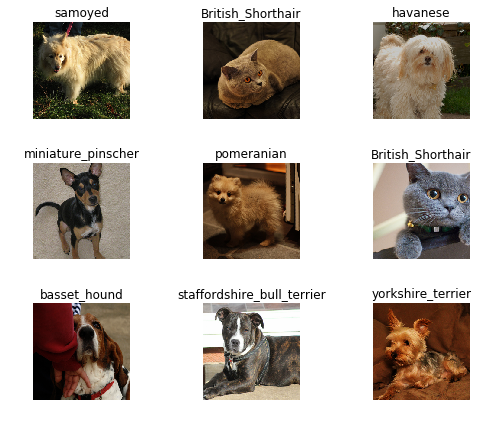

In [16]:
data.show_batch(rows=3, figsize=(7,6))

In [17]:
print(data.classes)
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

In [18]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /Users/iacutone/.torch/models/resnet34-333f7ec4.pth
87306240it [00:08, 10884073.99it/s]


In [19]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.889039,0.329818,0.099459,26:53
1,0.480626,0.269156,0.088633,3:40:19
2,0.313091,0.216839,0.075101,26:55
3,0.277515,0.202126,0.060893,26:47


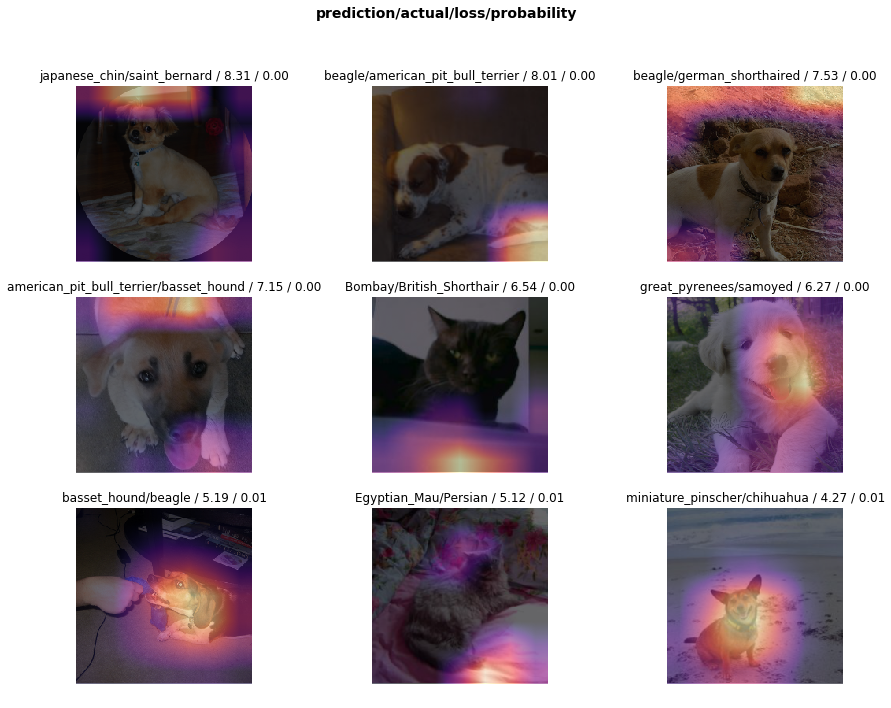

In [20]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,11))

In [21]:
interp.most_confused(min_val=2)

[('Egyptian_Mau', 'Bengal', 5),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5),
 ('British_Shorthair', 'Russian_Blue', 4),
 ('Maine_Coon', 'Bengal', 4),
 ('Russian_Blue', 'British_Shorthair', 4),
 ('beagle', 'basset_hound', 4),
 ('Bengal', 'Egyptian_Mau', 2),
 ('Birman', 'Ragdoll', 2),
 ('Birman', 'Siamese', 2),
 ('Ragdoll', 'Birman', 2),
 ('Russian_Blue', 'Abyssinian', 2),
 ('american_pit_bull_terrier', 'miniature_pinscher', 2),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 2),
 ('chihuahua', 'miniature_pinscher', 2),
 ('great_pyrenees', 'samoyed', 2),
 ('keeshond', 'leonberger', 2),
 ('miniature_pinscher', 'chihuahua', 2)]